In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel(r"D:\a1_Dataset_10Percent.xlsx")

In [3]:
data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [5]:
#analyse the null value in the data
data.isnull().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

In [6]:
#handle the null value
data['DemAffl'] = data['DemAffl'].fillna(data['DemAffl'].mode()[0])
data['DemAge'] = data['DemAge'].fillna(data['DemAge'].mode()[0])
data['DemClusterGroup'] = data['DemClusterGroup'].fillna(data['DemClusterGroup'].mode()[0])
data['DemGender'] = data['DemGender'].fillna(data['DemGender'].mode()[0])
data['DemReg'] = data['DemReg'].fillna(data['DemReg'].mode()[0])
data['DemTVReg'] = data['DemTVReg'].fillna(data['DemTVReg'].mode()[0])
data['LoyalTime'] = data['LoyalTime'].fillna(data['LoyalTime'].mode()[0])

In [7]:
data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,51.0,C,F,South East,London,Tin,0.01,5.0,0
1,8415498,15.0,51.0,C,M,South East,London,Gold,8000.00,5.0,1
2,12107603,8.0,51.0,C,M,Midlands,East,Tin,0.01,5.0,1
3,14400995,8.0,28.0,C,F,South East,London,Tin,0.01,5.0,1
4,28724674,14.0,67.0,C,F,South East,London,Tin,0.01,7.0,0


In [8]:
data.isnull().sum()

ID                 0
DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

In [9]:
#convet the categorical variable into numeric LabelEncoding
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

In [10]:
data['DemClusterGroup'].unique()

array(['C', 'B', 'E', 'D', 'F', 'A', 'U'], dtype=object)

In [11]:
data['DemClusterGroup']=label_encoder.fit_transform(data['DemClusterGroup'])

In [12]:
data['DemClusterGroup'].unique()

array([2, 1, 4, 3, 5, 0, 6])

In [13]:
data['DemGender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [14]:
data['DemGender'] = label_encoder.fit_transform(data['DemGender'])

In [15]:
data['DemGender'].unique()

array([0, 1, 2])

In [16]:
data['DemReg'].unique()

array(['South East', 'Midlands', 'North', 'South West', 'Scottish'],
      dtype=object)

In [17]:
data['DemReg'] = label_encoder.fit_transform(data['DemReg'])

In [18]:
data['DemReg'].unique()

array([3, 0, 1, 4, 2])

In [19]:
data['DemTVReg'].unique()

array(['London', 'East', 'Ulster', 'S & S East', 'Yorkshire',
       'Wales & West', 'N West', 'Midlands', 'S West', 'N East', 'N Scot',
       'C Scotland', 'Border'], dtype=object)

In [20]:
data['DemTVReg'] = label_encoder.fit_transform(data['DemTVReg'])

In [21]:
data['DemTVReg'].unique()

array([ 3,  2, 10,  8, 12, 11,  7,  4,  9,  5,  6,  1,  0])

In [22]:
data['LoyalClass'].unique()

array(['Tin', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [23]:
data['LoyalClass'] = label_encoder.fit_transform(data['LoyalClass'])

In [24]:
data['LoyalClass'].unique()

array([3, 0, 2, 1])

In [25]:
data

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,51.0,2,0,3,3,3,0.01,5.0,0
1,8415498,15.0,51.0,2,1,3,3,0,8000.00,5.0,1
2,12107603,8.0,51.0,2,1,0,2,3,0.01,5.0,1
3,14400995,8.0,28.0,2,0,3,3,3,0.01,5.0,1
4,28724674,14.0,67.0,2,0,3,3,3,0.01,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...
22218,52830893,13.0,49.0,1,1,3,3,2,500.00,9.0,0
22219,52834058,13.0,65.0,1,0,3,3,2,1500.00,5.0,0
22220,52834376,15.0,73.0,3,2,3,8,0,6053.06,12.0,0
22221,52837057,9.0,70.0,1,0,1,12,0,6000.00,5.0,0


In [26]:
data['LoyalClass'].value_counts()

2    8572
3    6487
0    6324
1     840
Name: LoyalClass, dtype: int64

In [27]:
import matplotlib.pyplot as plt

In [28]:
import seaborn as sns

In [30]:
df = data.drop(['ID'],axis=1)


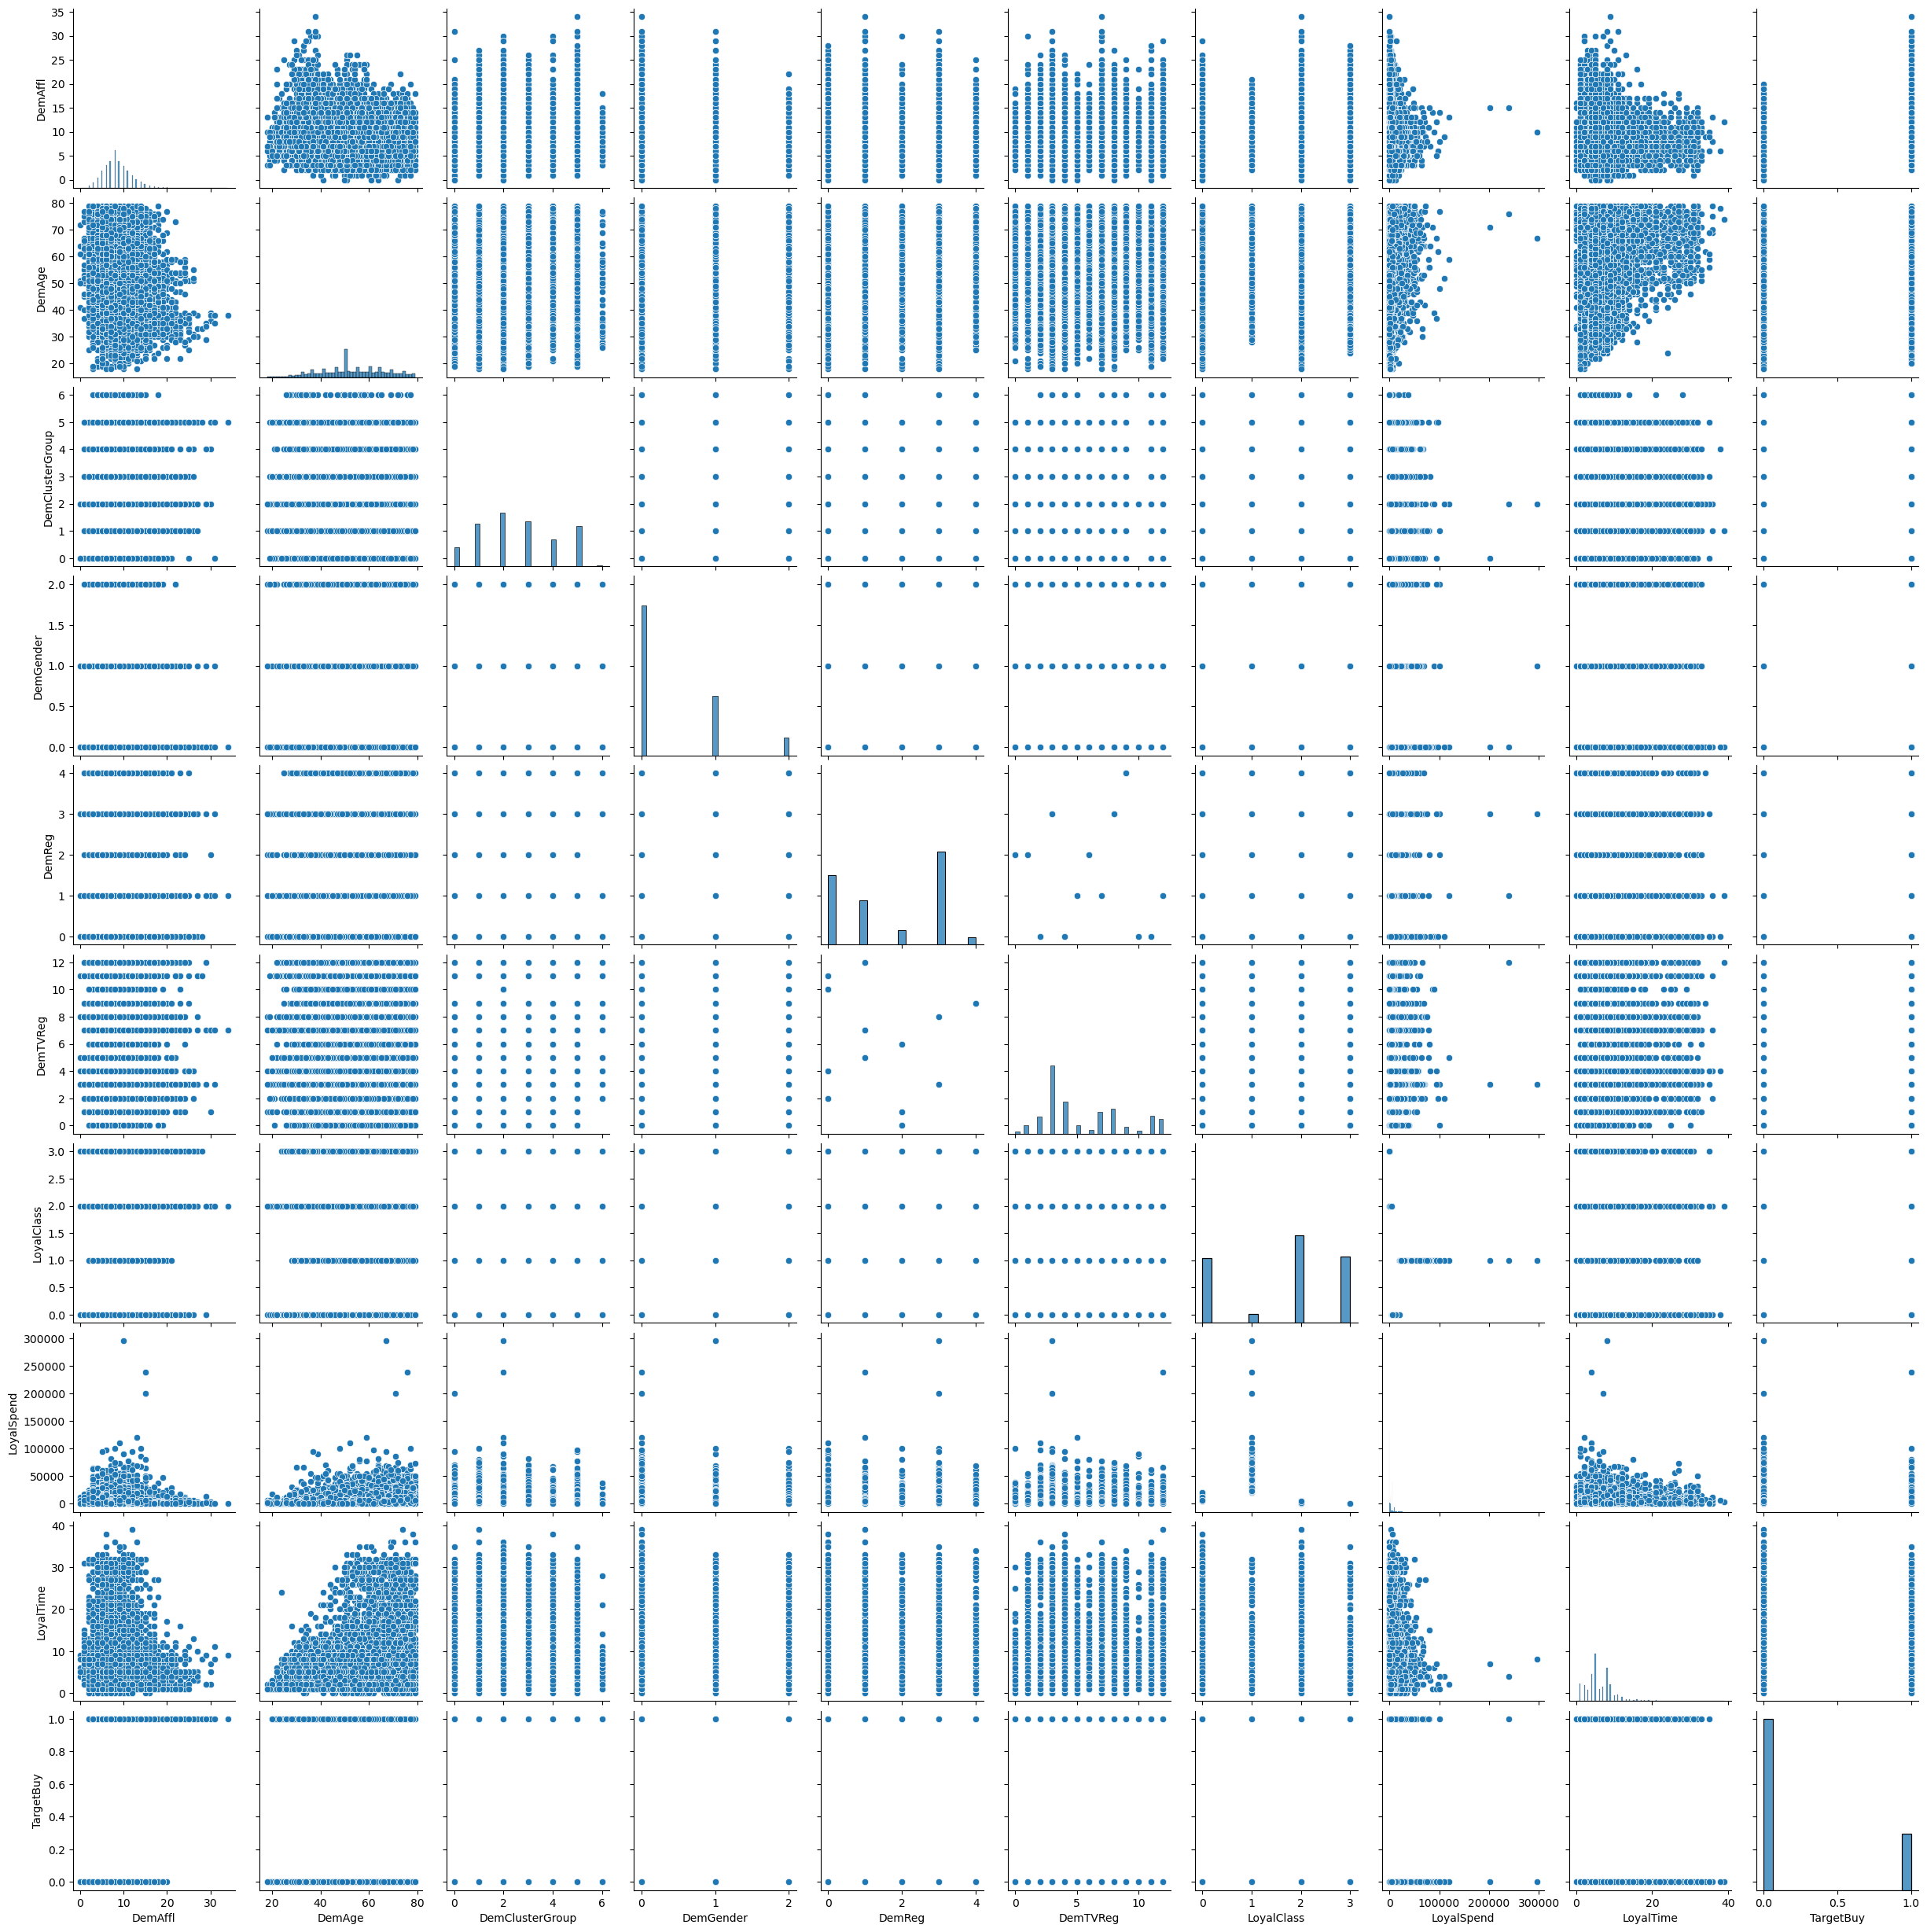

In [42]:
sns.pairplot(df)

In [31]:
df.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,3,0.01,5.0,0
1,15.0,51.0,2,1,3,3,0,8000.00,5.0,1
2,8.0,51.0,2,1,0,2,3,0.01,5.0,1
3,8.0,28.0,2,0,3,3,3,0.01,5.0,1
4,14.0,67.0,2,0,3,3,3,0.01,7.0,0


In [32]:
x = df.drop(['TargetBuy'],axis=1)   #independent variable


In [33]:
y=df['TargetBuy']

In [34]:
x.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,5.0,51.0,2,0,3,3,3,0.01,5.0
1,15.0,51.0,2,1,3,3,0,8000.00,5.0
2,8.0,51.0,2,1,0,2,3,0.01,5.0
3,8.0,28.0,2,0,3,3,3,0.01,5.0
4,14.0,67.0,2,0,3,3,3,0.01,7.0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x,y , test_size = 0.1)

In [37]:
from sklearn.linear_model  import LogisticRegression

In [38]:
classifier=LogisticRegression()

In [39]:
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions=classifier.predict(x_test)

In [43]:
print(predictions)

[1 1 0 ... 1 0 0]


In [44]:
#accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predictions)
ac = accuracy_score(y_test,predictions)

In [45]:
print(cm)

[[1628   65]
 [ 360  170]]


In [46]:
print(ac)

0.808816914080072
